# Importing Required Libraries

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings

figure = plt.figure(figsize=(15,8))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
filterwarnings(action="ignore")

<Figure size 1500x800 with 0 Axes>

# Perform An Exploratory Data Analysis

- Analyze the data and draw meaningful conclusions from the data.
- ○ Examine the distribution of *Bmi* (Body Mass Index)
- ○ Examine the relationship between *“smoker”* and *“charges”*
- ○ Examine the relationship between *“smoker”* and *“region”*.
- ○ Examine the relationship between *“bmi”* and *“sex”*.
- ○ Find the "*region*" with the most "*children*".
- ○ Examine the relationship between *“age”* and *“bmi”*.
- ○ Examine the relationship between *“bmi”* and *“children”*.
- ○ Is there an outlier in the "*bmi*" variable? Please review.
- ○ Examine the relationship between *“bmi”* and *“charges”*.
- ○ Examine the relationship between *“region”*, *“smoker”* and *“bmi”* using bar plot.
- Try to use data visualization techniques as much as possible while examining the
data.
- Please add the meanings you deduced from the analyzes as a comment line.

In [178]:
df = pd.read_csv("insurance.csv")
copy_df = df.copy()

In [112]:
copy_df.head() # age(x1) - sex(x2) - bmi(x3) - children(x4) - smoker(x5) - region(x6) - charges(y)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [113]:
copy_df.info() # We have 1338 observation units and no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [114]:
copy_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [115]:
copy_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#### Examine the distribution of Bmi (Body Mass Index)

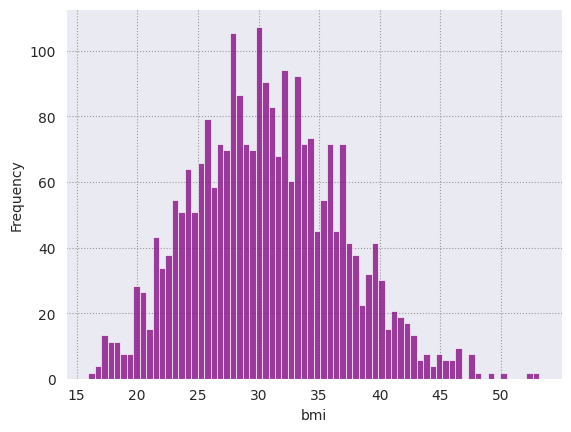

In [116]:

sns.histplot(copy_df.bmi, color="purple", stat="frequency", bins=70, discrete=False);
# As can be seen from this graph, the distribution is exactly predictable except for 1-2 outliers.

#### Examine the relationship between “smoker” and “charges”

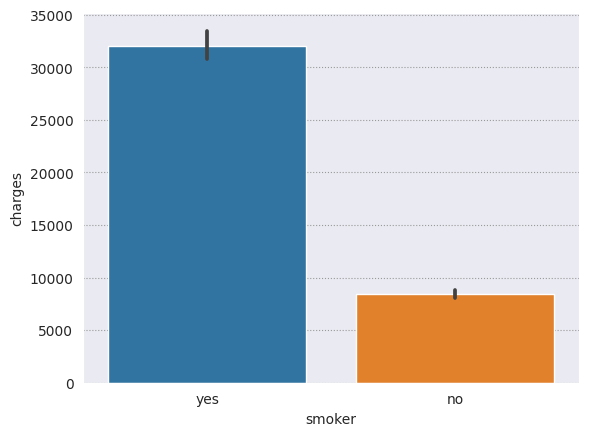

In [117]:
sns.barplot(data=copy_df, x='smoker', y='charges');
# As expected, smokers seem to spend more money on health, 
# and according to this rate, the smoker feature may be the most prominent feature for us.

<Axes: xlabel='smoker', ylabel='charges'>

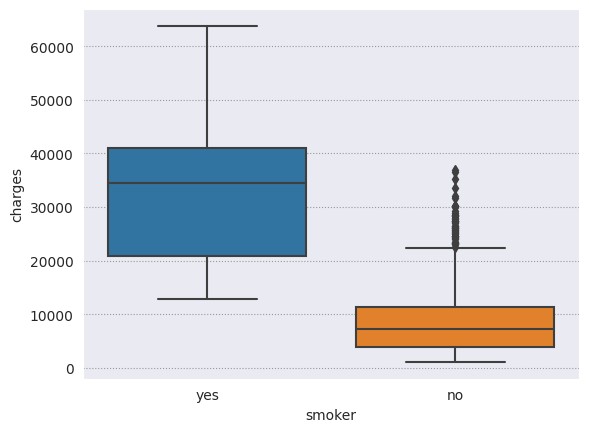

In [118]:
sns.boxplot(data=copy_df, x='smoker', y='charges')
# We see that the outliers in the charges feature are in the non-smokers section.
# Investigate whether these outliers are related to 'bmi' or 'age' etc. feature and correct them.

<Axes: xlabel='smoker', ylabel='charges'>

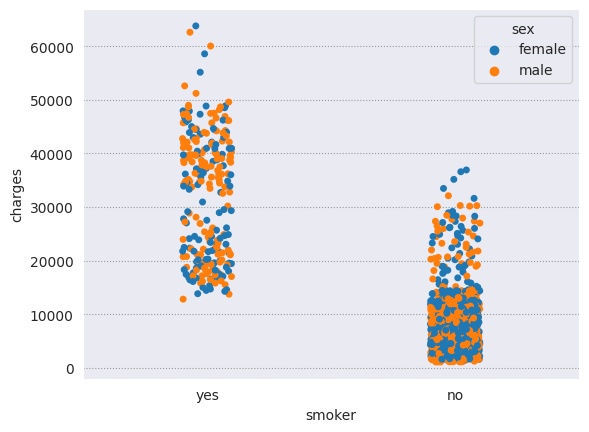

In [119]:
sns.stripplot(data=copy_df, x='smoker', y='charges', hue="sex")

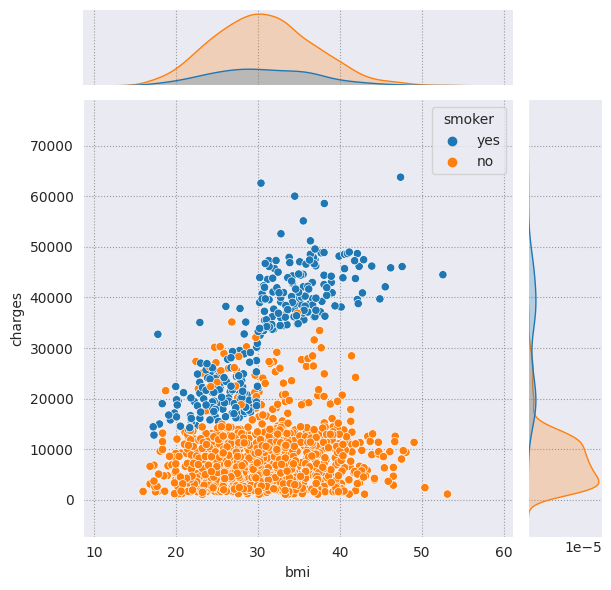

In [120]:
sns.jointplot(x="bmi", y="charges", data=df, hue="smoker");

#### Examine the relationship between “smoker” and “region”.

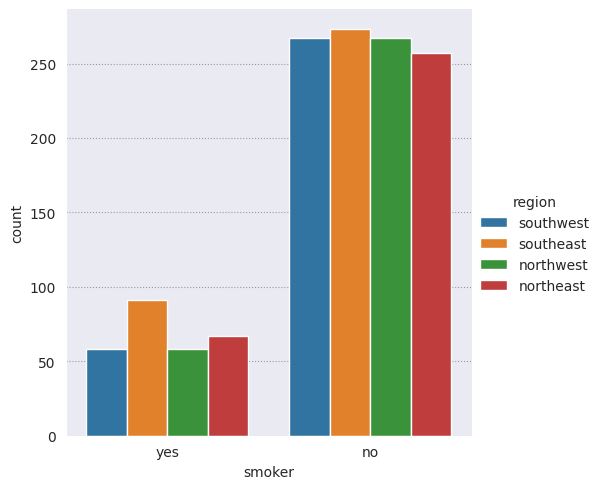

In [121]:
sns.catplot(data=copy_df, x='smoker', hue='region', kind="count");
# More cigarettes are smoked in Southeast than other regions.

#### Examine the relationship between “bmi” and “sex”.

<Axes: xlabel='sex', ylabel='bmi'>

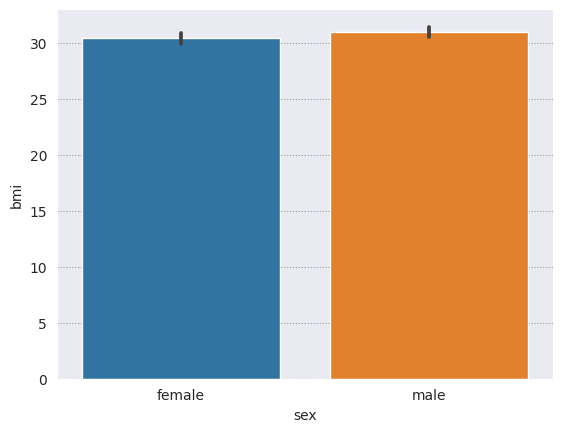

In [122]:
sns.barplot(data=copy_df, x='sex', y='bmi')
# Sex frequencies are very close to each other.

<Axes: xlabel='sex', ylabel='bmi'>

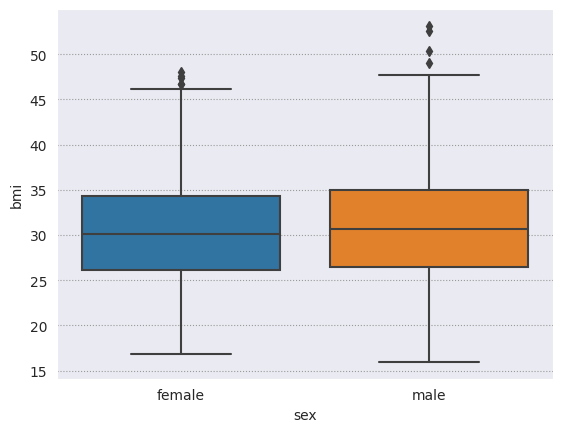

In [123]:
sns.boxplot(data=copy_df, x='sex', y='bmi')

#### Find the "region" with the most "children".

In [124]:
copy_df.groupby("region")["children"].sum().sort_values(ascending=False)
# Southeast > Northwest > Southwest > Northeast

region
southeast    382
northwest    373
southwest    371
northeast    339
Name: children, dtype: int64

#### Examine the relationship between “age” and “bmi”.

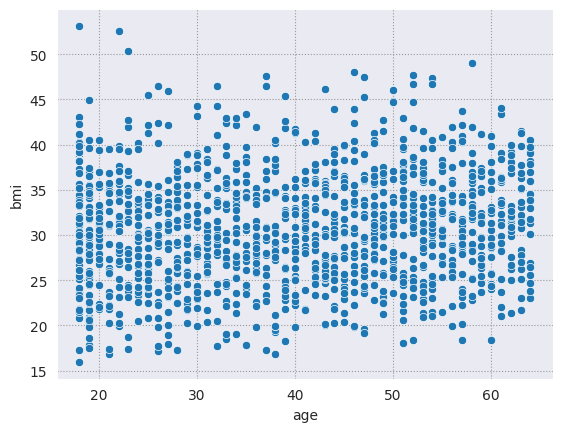

In [125]:
sns.scatterplot(x="age", y="bmi", data=copy_df);

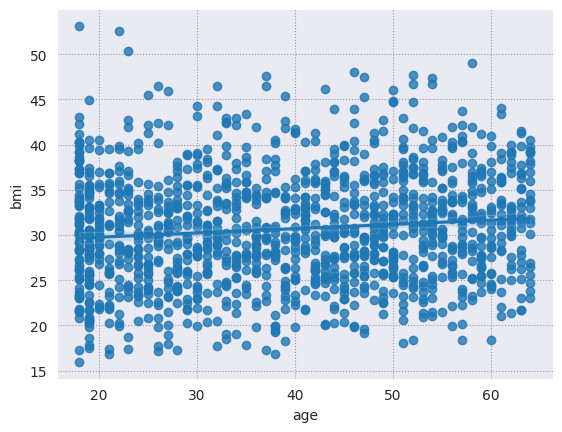

In [126]:
sns.regplot(x="age", y="bmi", data=copy_df);

In [127]:
copy_df[(copy_df["age"]<25)&(copy_df["bmi"]>50)&(copy_df["charges"]<3000)]

# outliers immediately caught the eye

,age,sex,bmi,children,smoker,region,charges
847,23,male,50.38,1,no,southeast,2438.0552
1317,18,male,53.13,0,no,southeast,1163.4627


In [128]:
copy_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Examine the relationship between “bmi” and “children”.

<Axes: xlabel='bmi', ylabel='Count'>

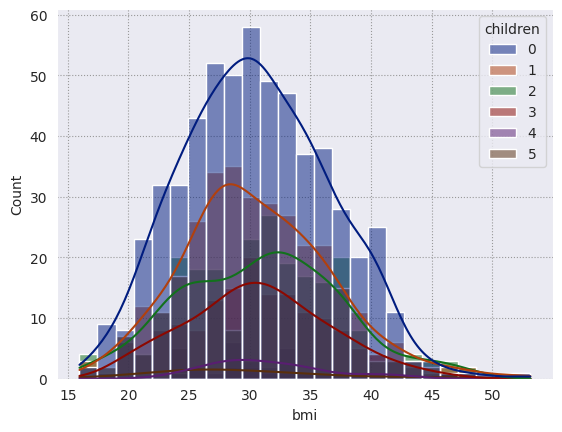

In [129]:
sns.histplot(x="bmi", hue="children", data=copy_df, palette="dark", kde=True)
# probably the bmi value that appears here increases with age

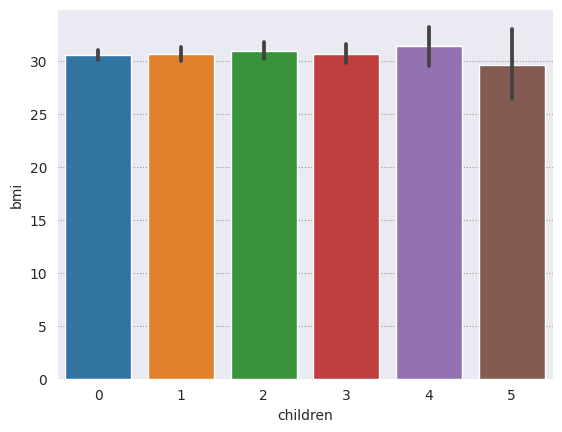

In [130]:
sns.barplot(data=copy_df, x='children', y='bmi');

#### Is there an outlier in the "bmi" variable? Please review.

<Axes: >

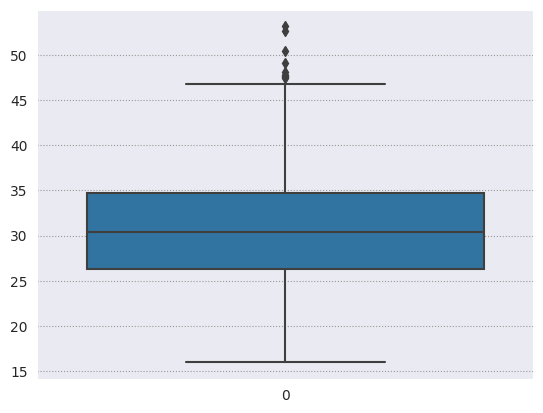

In [131]:
sns.boxplot(copy_df["bmi"])

#### Examine the relationship between “bmi” and “charges”.

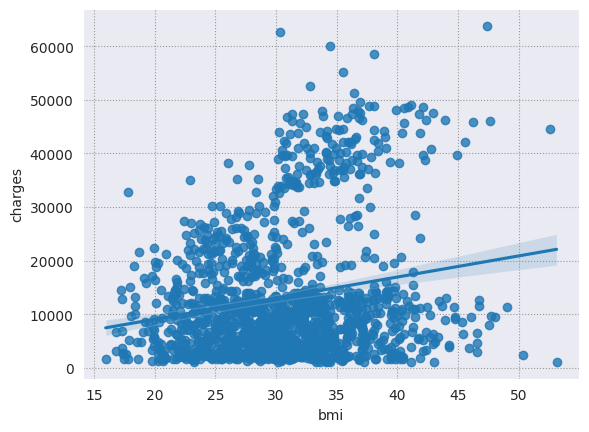

In [132]:
sns.regplot(data=copy_df, x="bmi", y="charges");

In [133]:
copy_df[["bmi","charges"]].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


#### Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

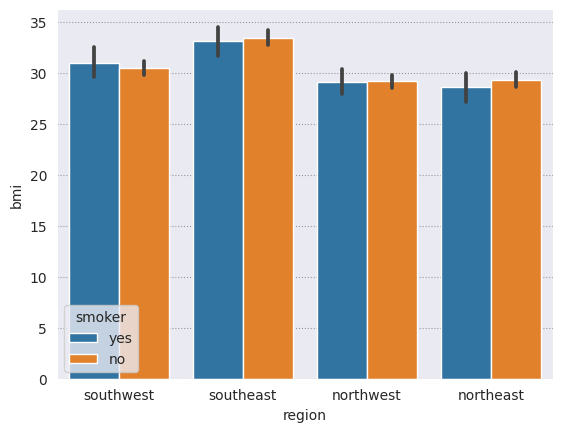

In [134]:
sns.barplot(x="region", y="bmi", hue="smoker", data=copy_df);

In [135]:
#

## Data Preprocessing
*In this section, prepare the data you have, for training the model.*

### Use Label Encoding and One-Hot Encoding techniques to deal with categorical variables.

In [136]:
from sklearn.preprocessing import LabelEncoder

In [179]:
le = LabelEncoder()

In [180]:
copy_df["sex"] = le.fit_transform(copy_df["sex"])
copy_df["smoker"] = le.fit_transform(copy_df["smoker"])

In [181]:
copy_df.head() # female 0 - male 1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [182]:
copy_df = pd.get_dummies(copy_df, columns=['region'], prefix=['region'])

In [183]:
for col in copy_df.loc[:, copy_df.columns.str.contains("region")]:
    copy_df[col] = copy_df[col].map({False: 0, True: 1})


In [184]:
copy_df.sample(10)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
285,46,1,26.620,1,0,7742.10980,0,0,1,0
345,34,0,29.260,3,0,6184.29940,0,0,1,0
243,40,1,35.300,3,0,7196.86700,0,0,0,1
755,31,1,27.645,2,0,5031.26955,1,0,0,0
361,35,1,30.500,1,0,4751.07000,0,0,0,1
163,32,0,29.800,2,0,5152.13400,0,0,0,1
70,27,0,24.750,0,1,16577.77950,0,0,1,0
521,32,0,44.220,0,0,3994.17780,0,0,1,0
611,38,0,34.800,2,0,6571.54400,0,0,0,1
1000,30,1,22.990,2,1,17361.76610,0,1,0,0


In [185]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   int64  
 7   region_northwest  1338 non-null   int64  
 8   region_southeast  1338 non-null   int64  
 9   region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.7 KB


In [144]:
copy_df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


<Axes: >

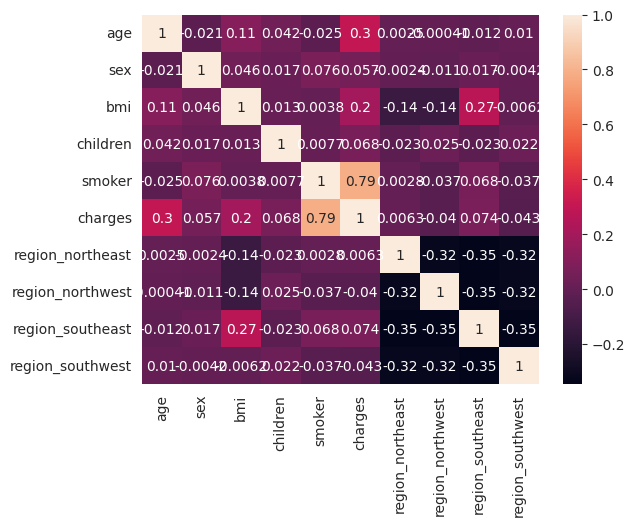

In [145]:
sns.heatmap(copy_df.corr(), annot=True)

#### Outlier

<Axes: >

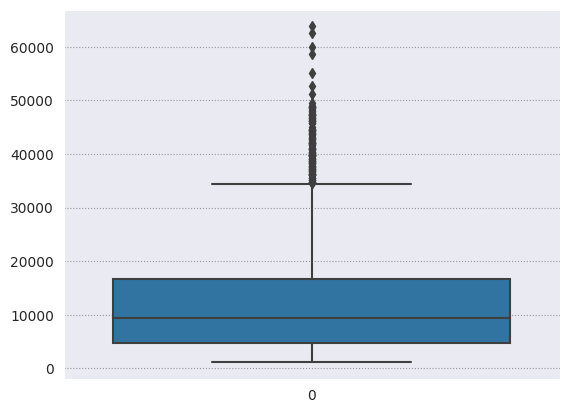

In [146]:
sns.boxplot(copy_df.charges)

In [147]:
Q1 = copy_df['charges'].quantile(0.25)
Q3 = copy_df['charges'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.75 * IQR

copy_df[copy_df['charges'] > upper_bound]

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
14,27,1,42.130,0,1,39611.75770,0,0,1,0
23,34,0,31.920,1,1,37701.87680,1,0,0,0
29,31,1,36.300,2,1,38711.00000,0,0,0,1
34,28,1,36.400,1,1,51194.55914,0,0,0,1
38,35,1,36.670,1,1,39774.27630,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1288,20,1,39.400,2,1,38344.56600,0,0,0,1
1300,45,1,30.360,0,1,62592.87309,0,0,1,0
1301,62,1,30.875,3,1,46718.16325,0,1,0,0
1303,43,1,27.800,0,1,37829.72420,0,0,0,1


<Axes: >

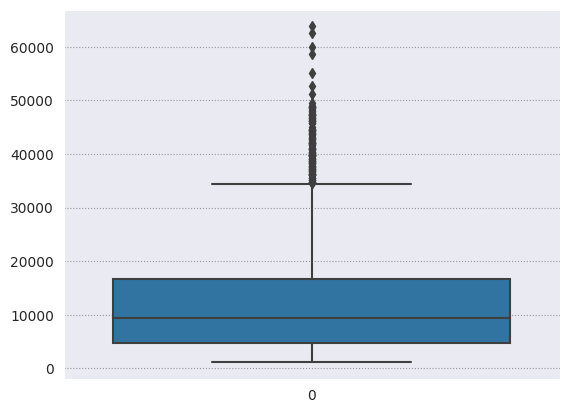

In [148]:
sns.boxplot(copy_df.charges)

In [192]:
copy_df['charges'] = np.where(copy_df['charges'] > upper_bound, upper_bound, copy_df['charges'])

## Scale

In [150]:
from sklearn.preprocessing import MinMaxScaler

In [151]:
scaler = MinMaxScaler()

In [152]:
copy_df["charges"] = scaler.fit_transform(copy_df[["charges"]])

In [153]:
copy_df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0.433737,0,0,0,1
1,18,1,33.770,1,0,0.016611,0,0,1,0
2,28,1,33.000,3,0,0.091562,0,0,1,0
3,33,1,22.705,0,0,0.574057,0,1,0,0
4,32,1,28.880,0,0,0.075531,0,1,0,0


#### Split your dataset into X_train,X_test, y_train, y_test.

In [154]:
from sklearn.model_selection import train_test_split

In [186]:
X = copy_df.loc[:, ~copy_df.columns.str.contains("charges")]
y = copy_df["charges"]

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=78)

## Model Selection

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [188]:
regressor_models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    KNeighborsRegressor()
]

In [189]:
best_model = None
best_score = float('inf')

In [200]:
for model in regressor_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"- - -\n{model}\nMSE:{mse}\nMAE:{mae}\nr2:{r2}\n- - -")
    if mse < best_score:
        best_model = model
        best_score = mse


- - -
LinearRegression()
MSE:37077483.565718085
MAE:4229.760474504882
r2:0.7027266053731205
- - -
- - -
DecisionTreeRegressor()
MSE:50616496.30965758
MAE:3347.02866490724
r2:0.5941758653760618
- - -
- - -
RandomForestRegressor()
MSE:24850132.987962067
MAE:2698.8195696050443
r2:0.8007609287408279
- - -
- - -
SVR()
MSE:136030168.78539014
MAE:7689.972121150894
r2:-0.09063901207927483
- - -
- - -
KNeighborsRegressor()
MSE:116697887.43105051
MAE:7641.978310760634
r2:0.06435998869973536
- - -


In [201]:
print("\n - - - - - \nBEST MODEL\n")
print("Best model:", best_model)
print("\n - - - - -")


 - - - - - 
BEST MODEL

Best model: RandomForestRegressor()

 - - - - -


#### Tuning

In [202]:
model = RandomForestRegressor()

##### Grid Search

In [203]:
from sklearn.model_selection import GridSearchCV

In [205]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [206]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [207]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [208]:
grid_y_pred = grid_search.predict(X_test)

In [209]:
print(mean_squared_error(y_test, grid_y_pred))
print(mean_absolute_error(y_test, grid_y_pred))
print(r2_score(y_test, grid_y_pred))

22360125.36526733
2723.82093223958
0.8207248784876677


##### Random Search

In [210]:
from sklearn.model_selection import RandomizedSearchCV

In [211]:
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [212]:
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)

In [213]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [214]:
print("Best params:", random_search.best_params_)
print("Best score:", -random_search.best_score_)

Best params: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}
Best score: 22290149.155005433


In [215]:
random_search_y_pred = random_search.predict(X_test)

In [216]:
print(mean_squared_error(y_test, random_search_y_pred))
print(mean_absolute_error(y_test, random_search_y_pred))
print(r2_score(y_test, random_search_y_pred))

22829919.83599947
2796.484363744724
0.816958242145049


#### Save Model

In [176]:
import pickle

In [217]:
with open('model.pickle', 'wb') as file:
    pickle.dump(grid_search, file)
